Requierments:
- numpy
- pandas
- matplotlib
- astropy
- astroalign
- aplpy
- synphot
- lmfit
- yaml
- A working version of SExtractor 
    Most usefull guides and resources to aid installation:
    - http://wiki.ipb.ac.rs/index.php/SExtractor_installation
    - https://www.astr.tohoku.ac.jp/~akhlaghi/sextractor_install.html
    SExtractor guide in order to understand the different ways of doing 
    photometery and the configuration parameters:
    - http://star-www.dur.ac.uk/~pdraper/extractor/Guide2source_extractor.pdf
    
In order to avoid any issues with crosscompatibility of packages I recommend using the 'opticamenv' environment that can be easily set up with the .yalm file.

You need to set the all the raw/reduced files in a folder (e.g., 'drop') inside your working directory (e.g., './'). Set the directory where the data is, the working directory where the files are to be saved and a catalogue directory where the catalogues for each image will be saved.

You need to do the reduction one camera at a time! Here you can select the images for the camera 2 --> 'C2*.fits'

The method to be used by SExtractor when doing the photometry also needs to be defined. The options are 'ISO', 'ISOCOR', 'AUTO', 'BEST', 'APER'and 'PETRO'. See help for opticam.Reduction() for more details. 

In [1]:
import opticam

datadir = '../202203/EI_UMa/EIUma_1503/EI_Uma/'
workdir = '../drop/'
catdir = '../drop/EI_UMa/EIUma_1503/EI_Uma/'
name = 'EI_Uma'
rule='C2*.fits'
ID='APER'


SyntaxError: invalid syntax (opticam_pipe.py, line 208)

In [ ]:
op = opticam.Reduction(rawdata=datadir,catalogue=catdir,name=name,rule=rule, 
                           config_fl_name=None, 
                           measurement_id=ID, size=16)
#'default_edit.sex'
op.edit_sex_param(['DETECT_THRESH','ANALYSIS_THRESH','DETECT_MINAREA'], [4,4,4]) 
# Edit the given parameters for the extraction by SExtractor
# This is usefull to determine the best combination of parameters that will allow for optimal extraction. Use the visual help from
# the 'fov.pdf' file in order to verify that all relevant sources in the field are appropriately found. The one caviat is that 
# Sextractor needs to be run for the whole stack before FOV image is displayed. Best workaround is to sample 3-10 images from
# the stack and then run the next 3 lines on directory containing only the samples. Issues with detection can be easily noticed
# that way.

op.sextractor()         # Perform aperture photometry
op.creat_ref_list()     # Make master star list & FoV image
op.photometry()         # Cross-match between all images

After using SExtractor to create all the catalogues, the program will create a master list (e.g., 'EI_Uma_C2_photo.csv') with unique identifiers for all the stars in the field (based on the first image, it can be defined as well). You can check the id of the target of interest in a image (as seen below) of the field with all the id numbers of the stars. In this case EI Uma has the identifier 2. In the end, the 'op.photometry' will create a singel 'csv' and 'pkl' file, containing all the photometry from all the stars.

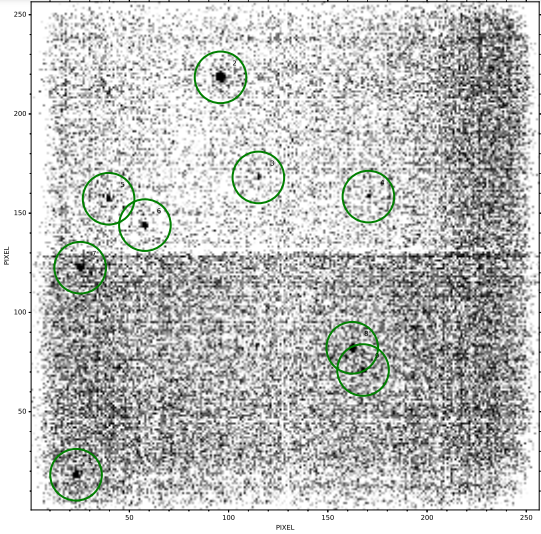

After checking the number for our target, we can recover the differential photomety for this particular target. It is important to note that in order to avoid optical aberations from the sides of the aperture any sources located less than 30 pixels from the edge is ignored. 

The following commands will produce a final file with the photometry for this target; 'EI_Uma_C2_lc_02.csv'. It will also output plots of the light curve:

In [ ]:
target = 2

photo = opticam.Analysis(workdir=workdir,catalogue=catdir,name=name,rule=rule,measurement_id=ID)

photo.differential_photo(target=target,ignore=[3],save=True) #does the differential photometry and saves the results
photo.rms_mag(target=target) 
photo.lightcurve(target=target,std=True,comp=None) #Does the lightcurve

photo.ccd_noise() #gives an estimate on the noise on the CCD
photo.single_dif_photo() #Shows differential photometry for each pair of sources in the field
photo.show_fluxes() #Shows the flux measured by the instrument for each source.

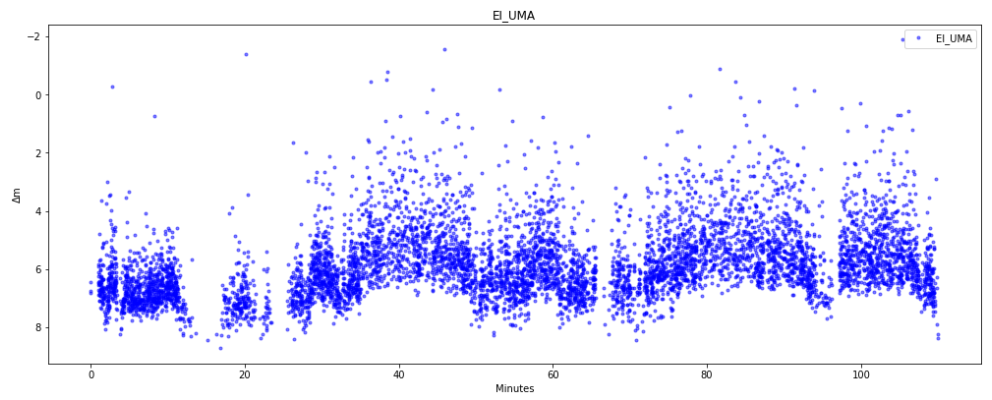

Important notes:

- if the field only contains 1 star, no differential photometry is possible. No diagnostic plot will be created and the
    lightcurve will simply show the measured changed in flux without any compensation.
- If an error arrises check that the right star is chosen, that it is not within 30 pixels of the edge and that it is not set to be ignored in differential_photo()